# ELE510 Image Processing with robot vision: LAB, Exercise 7, Stereo Vision and Camera Calibration.

**Purpose:** *To learn about imaging with two cameras, stereo, and reconstrution by triangulation.*

The theory for this exercise can be found in chapter 13 of the text book [1] and in appendix C in the compendium [2]. 
See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)
- [scipy](https://docs.scipy.org/doc/)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
first. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1 (Correspondence problem) 

![stereocamera.png](images/stereocamera.png)

Assume that we have a simple stereo system as shown in the figure. **L** and **R** denotes the focal point of the Left and Right camera respectively.  ${\mathbf P}$ is a point in the 3D world, and ${\mathbf p}$ in the 2D image plane. $^{\small L}{\mathbf P_w}$ denotes a world point with reference to the focal point of the Left camera.  
The baseline (line between the two optical centers) is $T = 10\,\text{cm}$ and the focal length $f = 2\,\text{cm}$. 

**a)** Consider the scene point $^{\small L}{\mathbf P_w} = [0.1\text{m},0,10\text{m}]^{T}$. Suppose that due to various errors, the image coordinate $x_{l}$ is 1 percent **smaller** than its true value, while the image coordinate $x_{r}$ is perfect. What is the error in depth $z_w$, in millimeters?

**b)** An image of resolution $1500\times1500$ pixels is seen by the Left and Right cameras. The image sensor size is $20\text{mm} \times 20\text{mm}$.  Let the disparity in the image coordinates be up to $75$ pixels. Using the same focal point and baseline, what is the depth of the image compare to the cameras?

**c)** What are the typical application for the correspondence problem? 



### a)
\begin{equation}
    Z=\frac{fT}{x_l - x_r}\\
    X_l = \frac{Z}{f}x_l  \therefore x_l = \frac{f X_l}{Z} = \frac{2cm \times 10cm}{1000cm}\\
    x_l = 0.02cm \\
    x_{l \space true \space value} = \frac{0.02cm}{0.99}=0.0202cm \\
    Z_{true \space value} = \frac{ X_l f}{x_{l \space true \space value}} =\frac{10cm * 2cm}{0.0202cm}=990cm
    Z_error = 1000cm - 990cm = 10cm = 100mm
\end{equation}


### b)
\begin{equation}
    disparity = 20mm/1500px * 75px =1mm \\
    \text{Assuming a coordinate value of}x_l \text{equals to 2mm:}\\
    Z=\frac{fT}{x_l-x_r} \therefore \\
    Z=\frac{2cm 10cm}{0.2cm - 0.1cm}\\
    Z=200cm
\end{equation}

### c) Typical applications of correspondence problem
* To interpret images from a moving camera in order to assemble a bigger one, likep anorama images
* Modern mobile phones have more than two cameras, they use the same principle to improve image quality by taking pictures of specific lenses and merging them with a single image
* Image motion and image comparison
* Detect duplicate images 

## Problem 2 (Block Matching)

The simplest algorithm to compute dense correspondence between a pair of stereo images is **block matching**.
Block matching is an *area-based* approach that relies upon a statistical correlation between local intensity regions.

For each pixel (x,y) in the left image, the right image is searched for the best match among all possible disparities $0 \le d \le d_{\text{max}}$.

**a)** Use the function `cv2.StereoBM_create(numDisparities=0, blockSize=21)` ([Documentation](https://docs.opencv.org/master/d9/dba/classcv_1_1StereoBM.html)) 
([Class Documentation](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#stereobm))
to computing stereo correspondence using the block matching algorithm. 

Find the disparity map between the following images: **./images/aloeL.jpg** and **./image/aloeR.jpg**.


In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

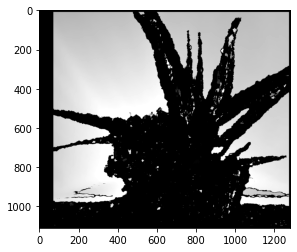

In [12]:
# Answer here
stereo_bm = cv2.StereoBM_create(numDisparities=0, blockSize=21)
im1 = cv2.imread('images/aloeL.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('images/aloeR.jpg', cv2.IMREAD_GRAYSCALE)
disp = stereo_bm.compute(im1, im2)
plt.imshow(disp,   cmap='gray')



**b)** What happens if you increase the `numDisparities` parameter in the `cv2.StereoBM_create()`? And if you change the `blockSize` parameter?  

Fixed blockSize 5 and increasing numDisparities by 16:

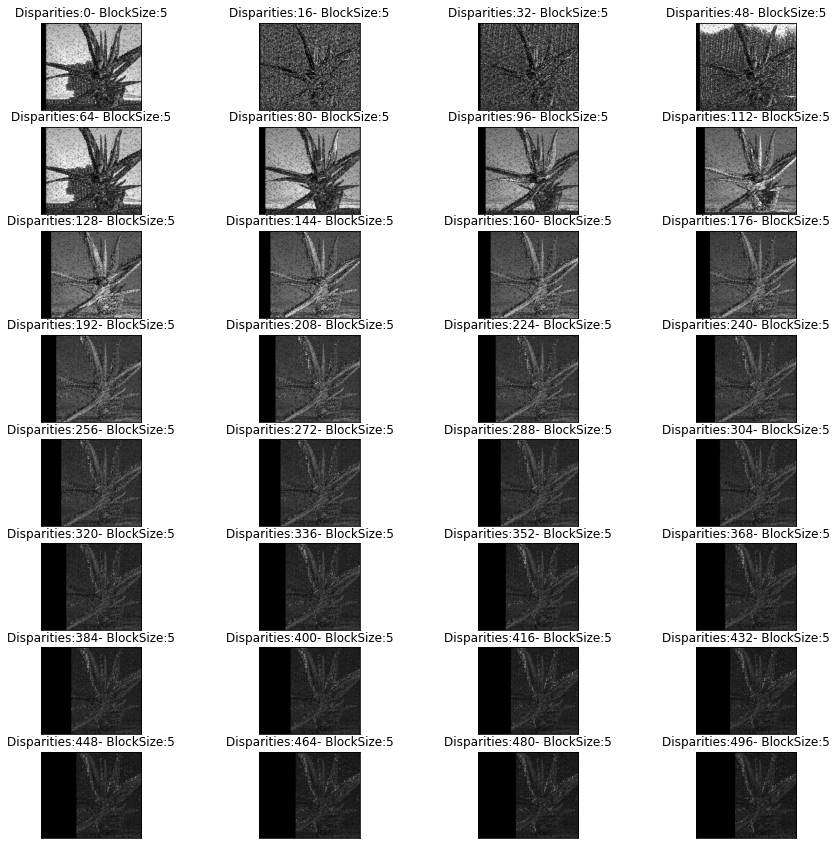

In [68]:
# Answer here 
def plotDisparities(numDisparities, blockSize):
    stereo_bm = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)
    im1 = cv2.imread('images/aloeL.jpg', cv2.IMREAD_GRAYSCALE)
    im2 = cv2.imread('images/aloeR.jpg', cv2.IMREAD_GRAYSCALE)
    disp = stereo_bm.compute(im1, im2)
    return disp


cols = 4
row = 0
idx = 0

numDisparities=0
blockSize=5
fig, axs = plt.subplots(8,4,figsize=(15,15))
while numDisparities < 512:
    disp = plotDisparities(numDisparities, blockSize)
    ax= axs[row][idx]
    ax.imshow(disp,   cmap='gray')
    ax.set_title(f'Disparities:{numDisparities}- BlockSize:{blockSize}')
    ax.set_xticks([])
    ax.set_yticks([])
    if (idx+1) % cols == 0:
        row += 1
        idx = 0
    else:
        idx +=1
    numDisparities +=16
    



Fixed  numDisparities and increasing blocksize:

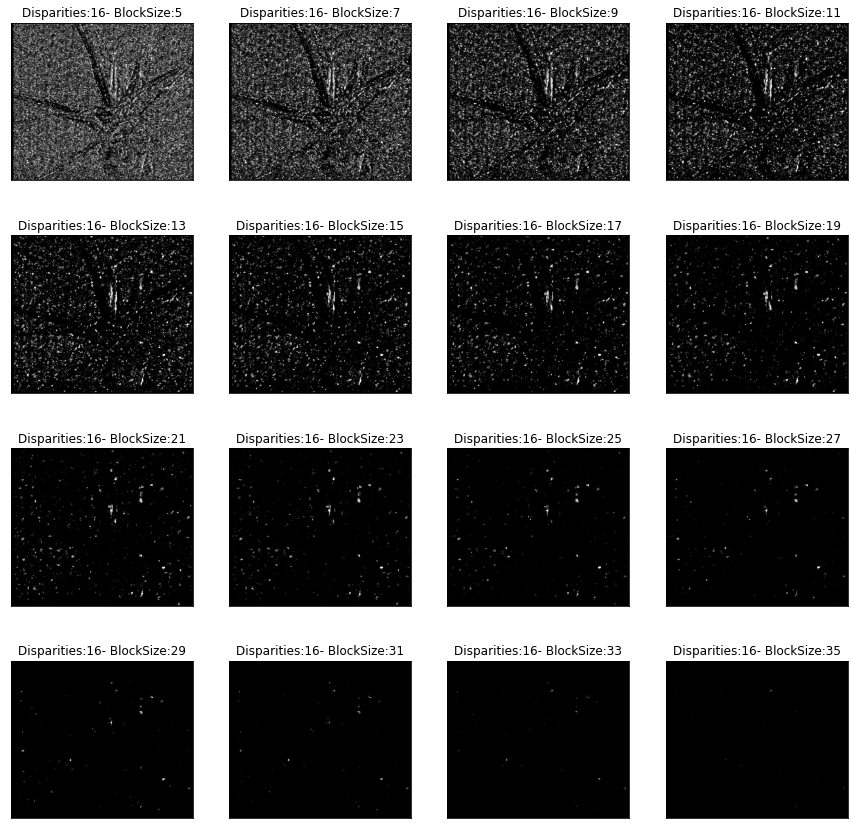

In [76]:
# Answer here 
def plotDisparities(numDisparities, blockSize):
    stereo_bm = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)
    im1 = cv2.imread('images/aloeL.jpg', cv2.IMREAD_GRAYSCALE)
    im2 = cv2.imread('images/aloeR.jpg', cv2.IMREAD_GRAYSCALE)
    disp = stereo_bm.compute(im1, im2)
    return disp


cols = 4
row = 0
idx = 0

numDisparities=16
blockSize=5
fig, axs = plt.subplots(4,4,figsize=(15,15))
while blockSize < 37:
    disp = plotDisparities(numDisparities, blockSize)
    ax= axs[row][idx]
    ax.imshow(disp,   cmap='gray')
    ax.set_title(f'Disparities:{numDisparities}- BlockSize:{blockSize}')
    ax.set_xticks([])
    ax.set_yticks([])
    if (idx+1) % cols == 0:
        row += 1
        idx = 0
    else:
        idx +=1
    blockSize +=2   

Increasing  numDisparities and blocksize:

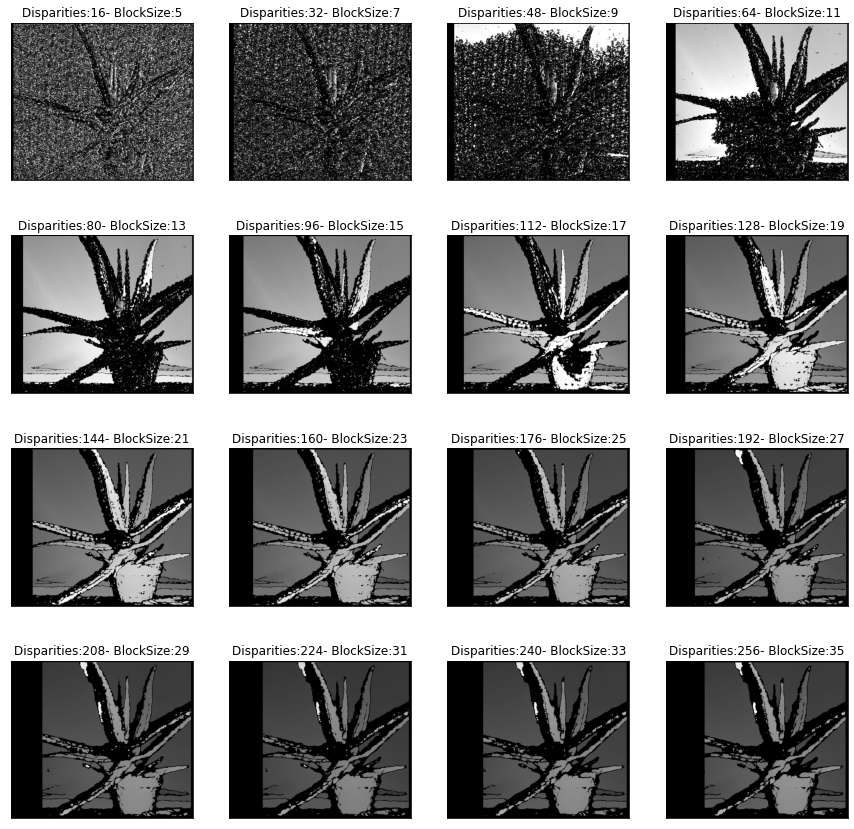

In [77]:
# Answer here 
def plotDisparities(numDisparities, blockSize):
    stereo_bm = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)
    im1 = cv2.imread('images/aloeL.jpg', cv2.IMREAD_GRAYSCALE)
    im2 = cv2.imread('images/aloeR.jpg', cv2.IMREAD_GRAYSCALE)
    disp = stereo_bm.compute(im1, im2)
    return disp


cols = 4
row = 0
idx = 0

numDisparities=16
blockSize=5
fig, axs = plt.subplots(4,4,figsize=(15,15))
while blockSize < 37:
    disp = plotDisparities(numDisparities, blockSize)
    ax= axs[row][idx]
    ax.imshow(disp,   cmap='gray')
    ax.set_title(f'Disparities:{numDisparities}- BlockSize:{blockSize}')
    ax.set_xticks([])
    ax.set_yticks([])
    if (idx+1) % cols == 0:
        row += 1
        idx = 0
    else:
        idx +=1
    blockSize +=2   
    numDisparities +=16

* The number of disparities with a small blockSize will show a darker image as it increases, meaning threre will be less and less differences between the image.

* If the blocssize increases with a static number of disparities there will be as well less differences

* On the other hand as the number both of them change there might be substantial differences depending on the adjustmens of the blocksize and the image will be more nitid.



## Problem 3 (Camera calibration)

Calibrate the camera using a set of checkerboard images (you can find them in *./images/left??.jpg*), where `??` indicates the index of the image 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>
<div class="alert alert-block alert-info">
Use the following lines to get the entire list of the images to process:
    
```python
from glob import glob

img_names = glob('./images/left??.jpg')
```
    
</div>
</details>


**a)** Use the checkerboard images to find the feature points using the openCV `cv2.findChessboardCorners()` function ([Documentation](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga93efa9b0aa890de240ca32b11253dd4a)).

Normally, we have talked about camera calibration as a method to know the intrinsic parameters of the camera, here we want to use the camera matrix and the relative distortion coefficients to undistort the previous images.
For a detailed explanation of distortion, read section 13.4.9 of the text book [1].

**b)** Calibrate the camera using the feature points discovered in **a)** and find the relative camera matrix and distortion coefficients using `cv2.calibrateCamera()` function ([Documentation](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga3207604e4b1a1758aa66acb6ed5aa65d)).

**P.S.:**   
By default, you should find 5 distortion coeffiencients (3 radial distortion coeff. ($k_1, k_2, k_3$) and 2 tangential coeff. ($p_1,p_2$)); these values are used later to find a new camera matrix and to undistort the images.    

**c)** Using the camera matrix and distortion coefficients, transform the images to compensate any kind of distortion using 
 `cv2.getOptimalNewCameraMatrix()` ([Documentation](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html#ga7a6c4e032c97f03ba747966e6ad862b1)) and `cv2.undistort()` ([Documentation](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga69f2545a8b62a6b0fc2ee060dc30559d)).
 
 

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# a)
# Function to find the feature points using cv2.findChessboardCorners(...)
# If the function finds the corners, return them, otherwise return None  
def findCorners(filename, pattern_size):
    
    # ...
    im = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    found, corners = cv2.findChessboardCorners(im, pattern_size)
    
    # ...
    
    if not found: return None
    return corners.reshape(-1, 2)

In [40]:
help(cv2.calibrateCamera)

Help on built-in function calibrateCamera:

calibrateCamera(...)
    calibrateCamera(objectPoints, imagePoints, imageSize, cameraMatrix, distCoeffs[, rvecs[, tvecs[, flags[, criteria]]]]) -> retval, cameraMatrix, distCoeffs, rvecs, tvecs
    .   @overload



In [54]:
# b)
# Function to calibrate the camera.
# Return the camera matrix and the distortion coeffiecients (radial & tangential)
def calibrateTheCamera(obj_points, img_points, img_shape):
    
    # The function estimates the intrinsic camera parameters and extrinsic parameters for each of the views
    flags = cv2.CALIB_ZERO_TANGENT_DIST | cv2.CALIB_FIX_K1 | cv2.CALIB_FIX_K2 | cv2.CALIB_FIX_K3
    ret, camera_matrix, dist_coefs, rvecs, tvecs  = cv2.calibrateCamera(obj_points,
                                                                        img_points,
                                                                        img_shape, 
                                                                        cameraMatrix = None,
                                                                        distCoeffs=None,
                                                                        flags=flags)
    
    
    return camera_matrix, dist_coefs

In [90]:
# c)
# Function that undistort the images using cv2.getOptimalNewCameraMatrix(...) and cv2.undistort(...)
# Plot the new undistorted images.
def undistortImage(filename, camera_matrix, dist_coefs):
    
    img = cv2.imread(filename,0)
    h, w = img.shape[:2]

    # Returns the new camera intrinsic matrix based on the camera matrix and the distortion coefficients
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs,(w,h),1 )
    
    # Transforms an image to compensate for lens distortion using the camera matrix, 
    # the distortion coefficients and the camera matrix of the distorted image.
    undistorted = cv2.undistort(new_camera_matrix, camera_matrix, dist_coefs)
    return undistorted
   

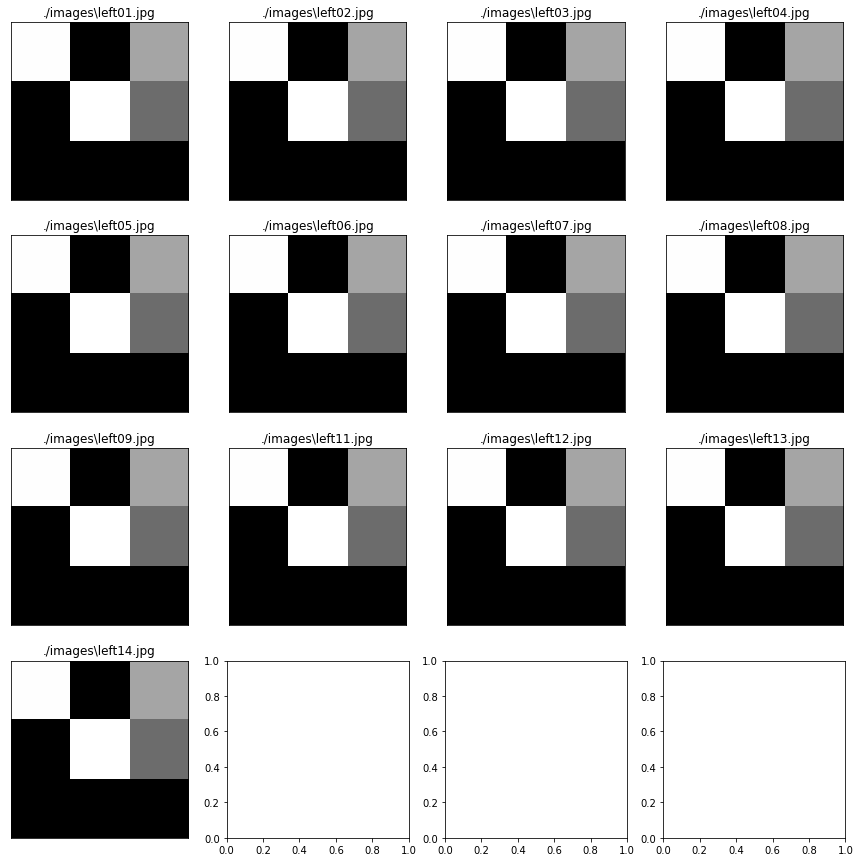

In [112]:
from glob import glob

obj_points = []
img_points = []
img_names = glob('./images/left??.jpg')


# From the documentation of cv2.findChessboardCorners:
# patternSize – Number of inner corners per a chessboard row and column
#( patternSize = cvSize(points_per_row,points_per_colum) = cvSize(columns,rows) ).
pattern_size = (9,6)

# Defining the world coordinates for 3D points
pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= 1

#### a)
# Find feature points with checkerboard images.
chessboards = [findCorners(filename, pattern_size) for filename in img_names]
for corners in [chessboard for chessboard in chessboards if chessboard is not None]:
    img_points.append(corners)
    obj_points.append(pattern_points)

#### b)
# Get the camera matrix and the distortion coeffiecients (radial & tangential).
img_shape = cv2.imread(img_names[0], cv2.IMREAD_GRAYSCALE).shape[:2]
camera_matrix, dist_coefs = calibrateTheCamera(obj_points, img_points, img_shape)

#### c) 
# Undistort the images and plot them.
cols = 4
row = 0
idx = 0

fig, axs = plt.subplots(4,4,figsize=(15,15))
for filename in img_names:
    undistorted = undistortImage(filename, camera_matrix, dist_coefs)
    ax= axs[row][idx]
    ax.imshow(undistorted,   cmap='gray')
    ax.set_title(filename)
    ax.set_xticks([])
    ax.set_yticks([])
    if (idx+1) % cols == 0:
        row += 1
        idx = 0
    else:
        idx +=1
    
plt.show()    


### Delivery (dead line) on CANVAS: 24.10.2021 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Tomasetti Luca, room E-401
E-mail: luca.tomasetti@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.